In [11]:
import pandas as pd
df = pd.read_csv('chat_df.csv')
df.head()

,성별,나이,학력,전공,학습이해도,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함
0,남,20대,대졸,기술,51 ~ 70%,2개월,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0
1,여,30대,고졸,NaN,51 ~ 70%,3,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0
2,여,20대,대졸,경제학,51 ~ 70%,2개월,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0
3,남,20대,대졸,기계공학,51 ~ 70%,4,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0
4,여,20대,대재,글로벌MICE,51 ~ 70%,3,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      21 non-null     object 
 1   나이      21 non-null     object 
 2   학력      21 non-null     object 
 3   전공      19 non-null     object 
 4   학습이해도   20 non-null     object 
 5   사용기간    21 non-null     object 
 6   만족도     21 non-null     float64
 7   학습효과    21 non-null     float64
 8   인지      21 non-null     float64
 9   감성      21 non-null     float64
 10  사회      21 non-null     float64
 11  심리      21 non-null     float64
 12  몰입감     21 non-null     int64  
 13  상호작용    21 non-null     float64
 14  불편함     20 non-null     float64
dtypes: float64(8), int64(1), object(6)
memory usage: 2.6+ KB


In [12]:
def categorize_major(major):
    if major in ['기술', '기계공학', '전자정보통신', '컴퓨터소프트웨어', '수학','의료공학과','생명과학',\
                 'Management Information System','빅데이터']:
        return '과학'
    elif major in ['경제학','글로벌MICE','행정학','경영학과','무역학과']:
        return '사회과학'
    else:  
        return '기타'

df['전공'] = df['전공'].apply(categorize_major)


In [13]:
df.전공.value_counts()

과학      9
기타      7
사회과학    5
Name: 전공, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

In [16]:
df.학습이해도.value_counts()

51 ~ 70%     10
71 ~ 80%      5
50% 미만        3
91 ~ 100%     1
81 ~ 90%      1
Name: 학습이해도, dtype: int64

In [15]:
# str.extract() 메소드는 정규 표현식(regular expression)을 사용하여 문자열에서 특정 패턴에 맞는 부분을 
# 추출하는데 사용됩니다. 
# 여기서 사용된 정규 표현식 '(\d)'는 한 개의 숫자를 의미합니다. 
from sklearn.preprocessing import LabelEncoder
cdf = df.copy()
cdf['사용기간'] = cdf['사용기간'].astype(str)
cdf['사용기간'] = cdf['사용기간'].str.extract('(\d)')
cdf['나이'] = cdf['나이'].str.extract('(\d+)')
cdf = label_encode(cdf, ['성별', '학력','전공','사용기간', '나이'])
cdf.head()

,성별,나이,학력,전공,학습이해도,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함
0,0,0,2,0,51 ~ 70%,1,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0
1,1,1,0,1,51 ~ 70%,2,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0
2,1,0,2,2,51 ~ 70%,1,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0
3,0,0,2,0,51 ~ 70%,3,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0
4,1,0,1,2,51 ~ 70%,2,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0


In [17]:
cdf['이해도'] = cdf['학습이해도'].apply(lambda x: 0 if x == '50% 미만' else\
                              (1 if x == '51 ~ 70%' else (2 if x == '71 ~ 80%' else \
                                                          (3 if x == '81 ~ 90% ' else 4))))

cdf = cdf.drop('학습이해도',axis=1)
cdf.head()                              

,성별,나이,학력,전공,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도
0,0,0,2,0,1,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0,1
1,1,1,0,1,2,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0,1
2,1,0,2,2,1,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0,1
3,0,0,2,0,3,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0,1
4,1,0,1,2,2,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0,1


In [19]:
cdf.불편함.value_counts()

3.0    7
4.0    6
2.0    4
5.0    2
1.0    1
Name: 불편함, dtype: int64

In [20]:
cdf['불편함'] = cdf['불편함'].fillna(cdf['불편함'].median())
cdf.불편함.isnull().sum()

0

In [21]:
cdf.columns

Index(['성별', '나이', '학력', '전공', '사용기간', '만족도', '학습효과', '인지', '감성', '사회', '심리',
       '몰입감', '상호작용', '불편함', '이해도'],
      dtype='object')

In [22]:
cdf = cdf[['성별', '나이', '학력', '전공', '사용기간',  '인지', '감성', '사회', '심리', \
           '몰입감','상호작용', '불편함', '이해도', '학습효과','만족도']]

In [23]:
cdf.head()

,성별,나이,학력,전공,사용기간,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도,학습효과,만족도
0,0,0,2,0,1,5.0,3.0,1.0,1.0,5,5.000000,3.0,1,4.9,4.5
1,1,1,0,1,2,4.0,3.5,2.5,2.0,3,3.000000,4.0,1,3.7,3.8
2,1,0,2,2,1,4.0,2.0,1.0,1.0,1,4.000000,4.0,1,4.6,4.7
3,0,0,2,0,3,5.0,4.5,1.0,2.5,1,4.666667,4.0,1,4.6,4.8
4,1,0,1,2,2,4.0,4.5,1.5,3.0,2,2.666667,5.0,1,4.1,4.4


In [28]:
import matplotlib.font_manager as fm
font_list = [f.name for f in fm.fontManager.ttflist]

han_fonts = [font_name for font_name in font_list if  'Gothic' in font_name]
print(han_fonts)

['Showcard Gothic', 'Hancom Gothic', 'HYGothic-Extra', 'MS Gothic', 'Copperplate Gothic Light', 'Malgun Gothic', 'Hancom Gothic', 'Yu Gothic', 'Century Gothic', 'Copperplate Gothic Light', 'Malgun Gothic', 'HYGothic-Medium', 'Franklin Gothic Book', 'Century Gothic', 'HYGothic-Extra', 'Franklin Gothic Book', 'Franklin Gothic Medium', 'Franklin Gothic Heavy', 'Franklin Gothic Demi Cond', 'Franklin Gothic Book', 'Century Gothic', 'Yu Gothic', 'Hancom Gothic', 'HYGothic-Medium', 'Century Gothic', 'Yu Gothic', 'Franklin Gothic Book', 'Yu Gothic', 'Franklin Gothic Demi', 'Franklin Gothic Demi', 'Malgun Gothic', 'Malgun Gothic', 'Franklin Gothic Medium', 'Showcard Gothic', 'Hancom Gothic', 'Franklin Gothic Demi', 'Franklin Gothic Medium Cond', 'MS Gothic', 'Franklin Gothic Heavy', 'Malgun Gothic', 'Yu Gothic', 'Franklin Gothic Medium', 'Franklin Gothic Heavy', 'Century Gothic', 'Copperplate Gothic Bold', 'Yu Gothic', 'Century Gothic', 'Franklin Gothic Demi', 'Yu Gothic', 'Century Gothic', 'Co

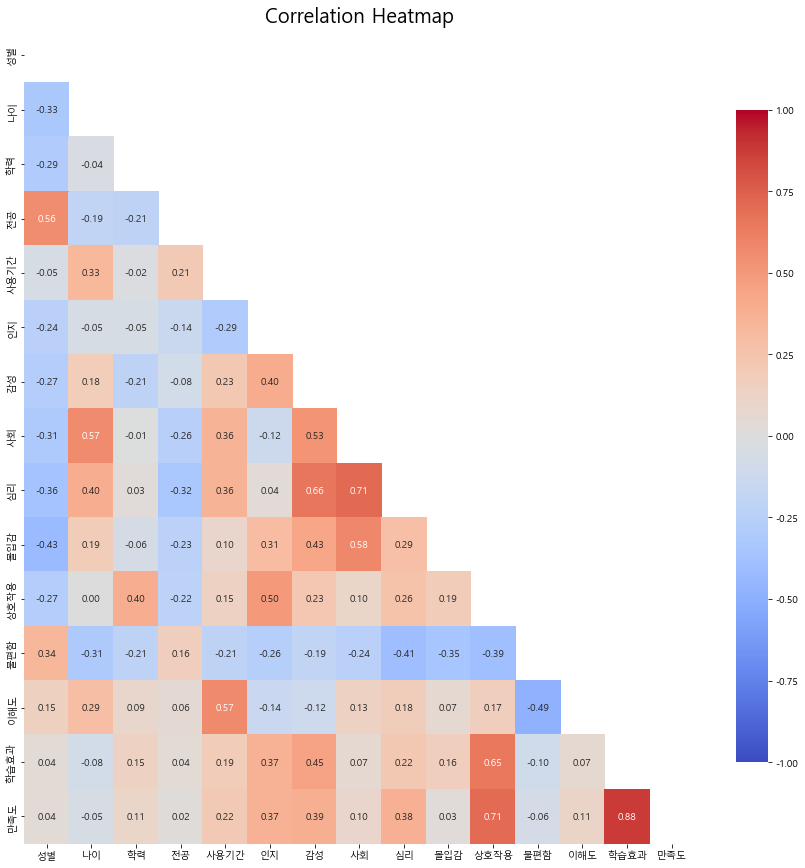

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

# 한글을 지원하는 폰트로 설정합니다. 여기에서는 'NanumGothic'을 예로 들었습니다.
plt.rcParams["font.family"] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 상관계수 행렬 계산
corr = cdf.corr()

# 상관계수 행렬의 상삼각행렬의 마스크를 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 그림 사이즈 설정
plt.figure(figsize=(15,15))

# 마스크를 적용한 삼각형 히트맵 그리기
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, \
            cbar_kws={"shrink": .8})

# 타이틀 설정
plt.title('Correlation Heatmap', fontsize=20)
plt.show()


In [ ]:
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 리스트 확인
font_list = [f.name for f in fm.fontManager.ttflist]

# 한글이 포함된 폰트명만 추출
han_fonts = [font_name for font_name in font_list if 'Gothic' in font_name]
print(han_fonts)

<Figure size 720x720 with 0 Axes>

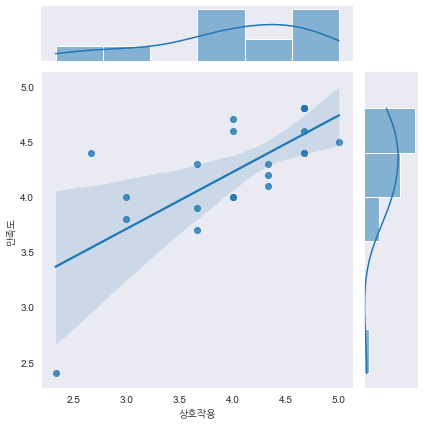

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

plt.figure(figsize=(10,10))
plt.rcParams["font.family"] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

sns.set_style( 'dark')
g = sns.jointplot(data=cdf, x="상호작용", y="만족도",kind='reg')
g.ax_joint.set_xlabel('상호작용', fontname='NanumGothic')
g.ax_joint.set_ylabel('만족도', fontname='NanumGothic')
plt.show()

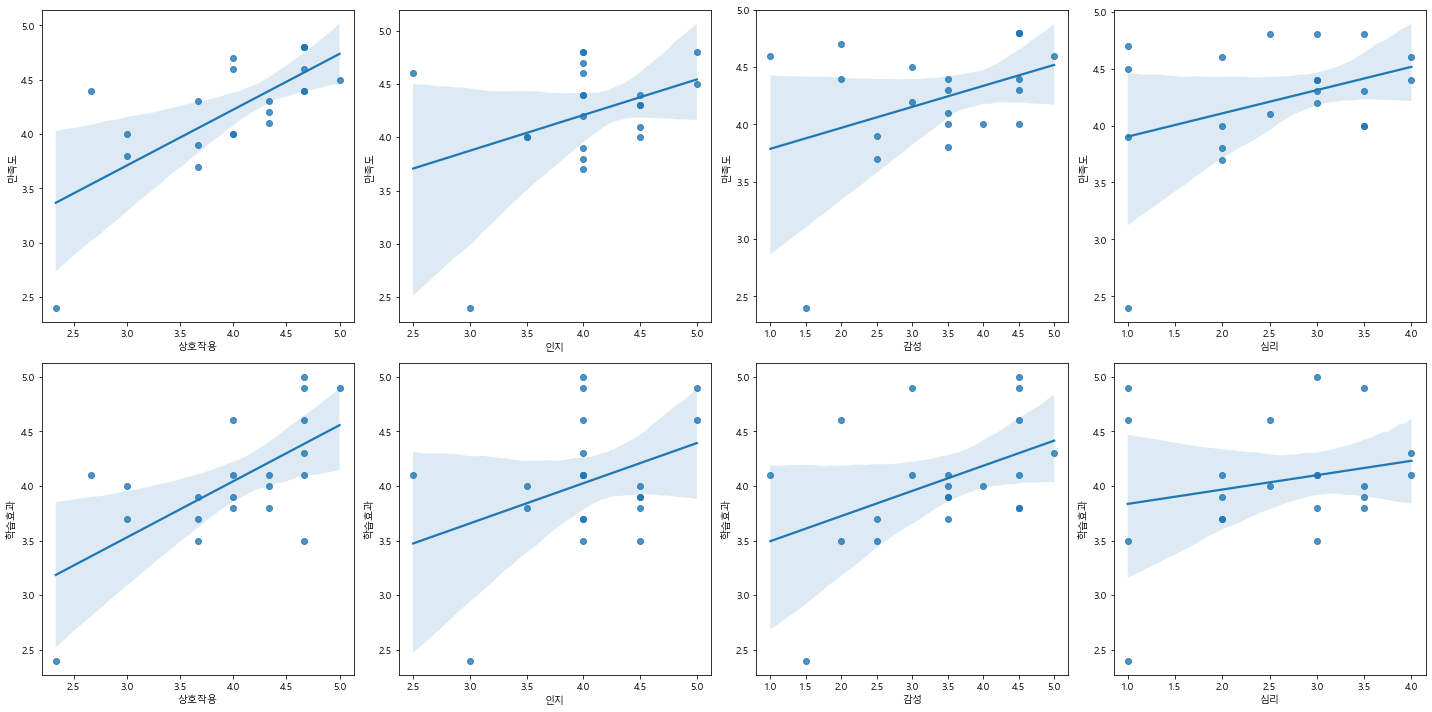

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

sns.regplot(data=cdf, x="상호작용", y="만족도",ax=axs[0,0])
sns.regplot(data=cdf, x="인지", y="만족도",ax=axs[0,1])
sns.regplot(data=cdf, x="감성", y="만족도",ax=axs[0,2])
sns.regplot(data=cdf, x="심리", y="만족도",ax=axs[0,3])
sns.regplot(data=cdf, x="상호작용", y="학습효과",ax=axs[1,0])
sns.regplot(data=cdf, x="인지", y="학습효과",ax=axs[1,1])
sns.regplot(data=cdf, x="감성", y="학습효과",ax=axs[1,2])
sns.regplot(data=cdf, x="심리", y="학습효과",ax=axs[1,3])

plt.tight_layout()
plt.show()

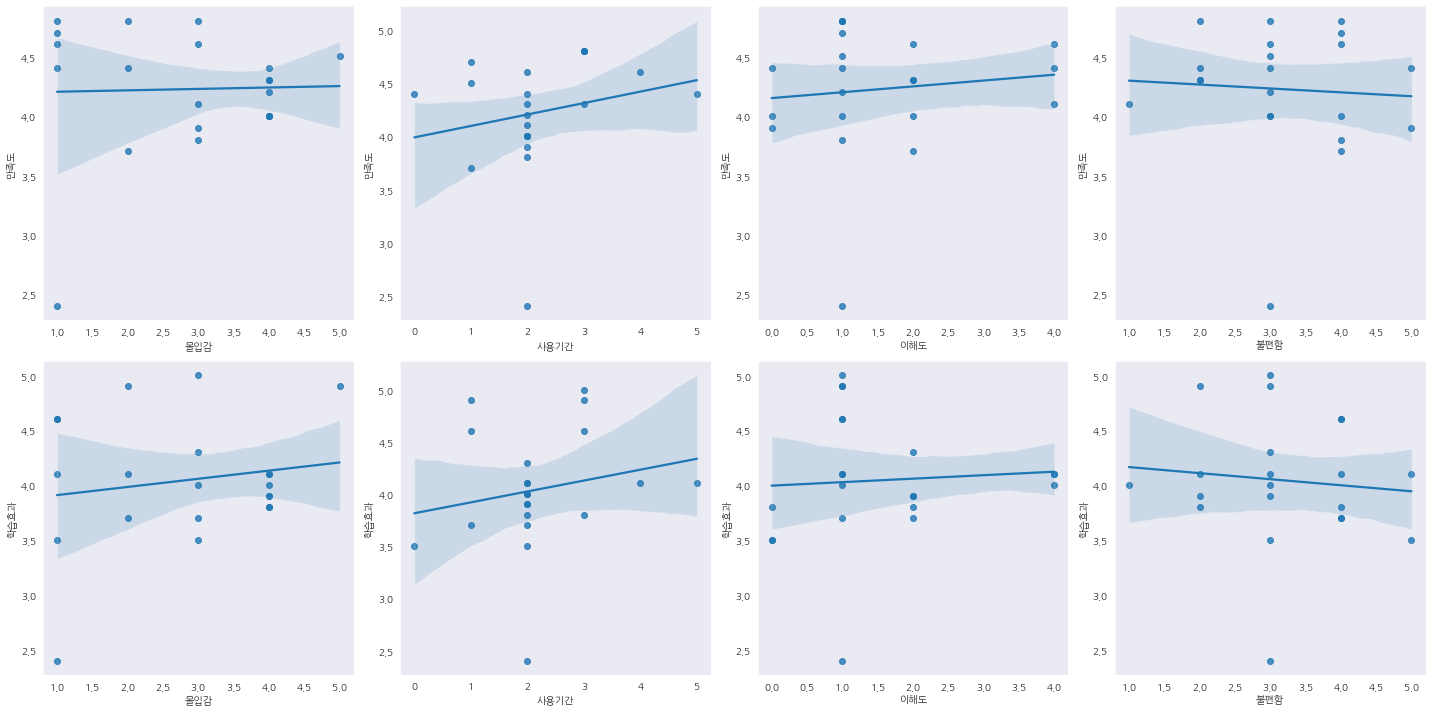

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

sns.regplot(data=cdf, x="몰입감", y="만족도",ax=axs[0,0])
sns.regplot(data=cdf, x="사용기간", y="만족도",ax=axs[0,1])
sns.regplot(data=cdf, x="이해도", y="만족도",ax=axs[0,2])
sns.regplot(data=cdf, x="불편함", y="만족도",ax=axs[0,3])
sns.regplot(data=cdf, x="몰입감", y="학습효과",ax=axs[1,0])
sns.regplot(data=cdf, x="사용기간", y="학습효과",ax=axs[1,1])
sns.regplot(data=cdf, x="이해도", y="학습효과",ax=axs[1,2])
sns.regplot(data=cdf, x="불편함", y="학습효과",ax=axs[1,3])

plt.tight_layout()
plt.show()

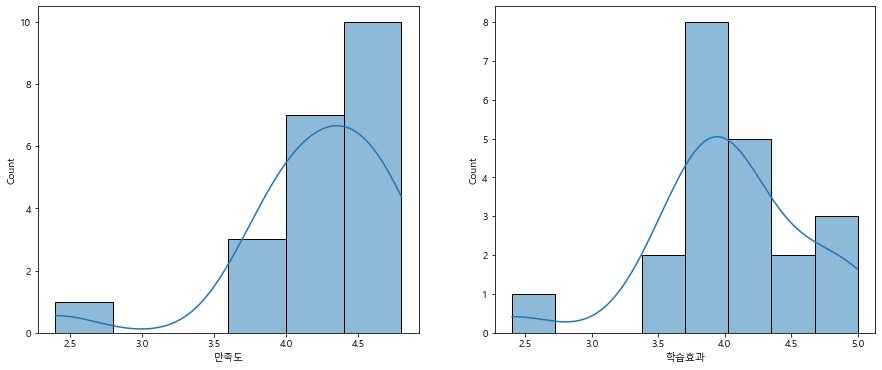

In [31]:
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.histplot(data=cdf, x='만족도',kde=True,ax=ax[0])
sns.histplot(data=cdf, x='학습효과',kde=True,ax=ax[1])

In [32]:
cdf.to_csv('cdf.csv',index=False)
cdf = pd.read_csv('cdf.csv')
cdf.head()

,성별,나이,학력,전공,사용기간,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도,학습효과,만족도
0,0,0,2,0,1,5.0,3.0,1.0,1.0,5,5.000000,3.0,1,4.9,4.5
1,1,1,0,1,2,4.0,3.5,2.5,2.0,3,3.000000,4.0,1,3.7,3.8
2,1,0,2,2,1,4.0,2.0,1.0,1.0,1,4.000000,4.0,1,4.6,4.7
3,0,0,2,0,3,5.0,4.5,1.0,2.5,1,4.666667,4.0,1,4.6,4.8
4,1,0,1,2,2,4.0,4.5,1.5,3.0,2,2.666667,5.0,1,4.1,4.4


In [33]:
# cdf1 = cdf[['인지', '감성', '심리','상호작용', '불편함','몰입감','사용기간','만족도']]
cdf1 = cdf[['인지', '감성', '심리','상호작용','불편함','만족도']]
# cdf2 = cdf[['인지', '감성', '심리','상호작용', '불편함','몰입감','사용기간','학습효과']]
cdf2 = cdf[['인지', '감성', '심리','상호작용','불편함','학습효과']]

In [34]:
cdf1.head()

,인지,감성,심리,상호작용,불편함,만족도
0,5.0,3.0,1.0,5.000000,3.0,4.5
1,4.0,3.5,2.0,3.000000,4.0,3.8
2,4.0,2.0,1.0,4.000000,4.0,4.7
3,5.0,4.5,2.5,4.666667,4.0,4.8
4,4.0,4.5,3.0,2.666667,5.0,4.4


In [43]:
# 만족도
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 독립 변수와 종속 변수 설정
# X와 y를 실제 데이터에 맞게 수정해야 합니다.
X_data = cdf1.drop(['만족도'],axis=1,inplace=False)
y_target = cdf1['만족도']

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.2, random_state=1)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))


MSE : 0.380 , RMSE : 0.617


In [44]:
# 교차검증
from sklearn.model_selection import cross_val_score
import numpy as np

X_data = cdf1.drop(['만족도'], axis=1)
y_target = cdf1['만족도']
lr = LinearRegression()
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {:.3f}'.format(avg_rmse))

5 folds의 개별 RMSE scores: [0.61 0.32 0.49 0.66 0.66]
5 folds의 평균 RMSE: 0.551


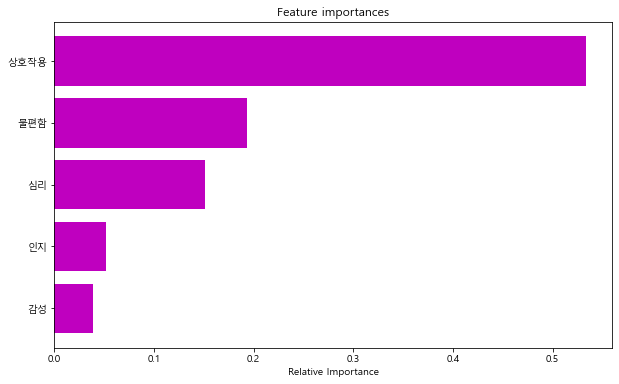

In [45]:
# feature importance 시각화

lr.fit(X_data, y_target)
importance = np.abs(lr.coef_)
feature_names = X_data.columns
indices = np.argsort(importance)

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(range(len(indices)), importance[indices], color='m', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Ridge, Lasso, Elasticnet으로 선형회귀 모델 생성 및 평가하세요

In [46]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.5)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [47]:
ridge_alphas = [ 0.0, 0.05, 0.1, 0.5]
coeff_elastic_df =get_linear_reg_eval('Ridge', params=ridge_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  Ridge #######
alpha 0.0일 때 5 폴드 세트의 평균 RMSE: 0.551 
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 0.548 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.545 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.529 


In [48]:
lasso_alphas = [ 0.0, 0.05, 0.1, 0.5]
coeff_elastic_df =get_linear_reg_eval('Lasso', params=lasso_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.0일 때 5 폴드 세트의 평균 RMSE: 0.551 
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 0.516 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.470 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.490 


In [49]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.5로 고정
elastic_alphas = [ 0.0, 0.05, 0.1, 0.5]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.0일 때 5 폴드 세트의 평균 RMSE: 0.551 
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 0.520 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.506 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.481 


In [50]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.0,alpha:0.05,alpha:0.1,alpha:0.5
상호작용,0.533050,0.454984,0.371257,0.021687
불편함,0.193066,0.116214,0.053427,-0.000000
심리,0.151745,0.089319,0.050873,0.000000
인지,0.051720,0.000000,0.000000,0.000000
감성,0.038679,0.061772,0.063433,0.000000


In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [52]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet

X_data = cdf1.drop(['만족도'], axis=1)
y_target = cdf1['만족도']
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('ElasticNet', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(21, 5) (21, 5)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.506 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.490 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.490 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.490 
(21, 5) (21, 5)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.525 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.490 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.490 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.490 
(21, 20) (21, 5)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.483 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.490 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.490 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.490 
(21, 5) (21, 5)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.463 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.490 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.490 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.490 
(21, 20) (21, 5)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.451 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.490 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.490 
alpha 100일